<a href="https://colab.research.google.com/github/TariqAlhathloul/Time-Series-Forecasting-Project/blob/main/WorkSpace/traffic_counts_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Description: This dataset includes real-time and historical traffic congestion data from Chicago, including traffic flow, speed, and incident reports. It's valuable for studying traffic patterns in urban environments.

## Dataset Overview

#### 1. `ID`: A unique identifier for each traffic count record.

#### 2. `Traffic Volume Count Location Address`: The address where the traffic volume was recorded.

#### 3. `Street`: The street name where the traffic count was taken.

#### 4. `Date of Count`: The date on which the traffic count was recorded.

#### 5. `Total Passing Vehicle Volume`: The total number of vehicles that passed the location during the count period.

#### 6. ` Vehicle Volume By Each Direction of Traffic`: The vehicle count divided by direction (e.g., East Bound, West Bound).

#### 7. `Latitude`: The latitude coordinate of the traffic count location.

#### 8. `Longitude`: The longitude coordinate of the traffic count location.

#### 9. `Location`: The geographic location as a tuple of latitude and longitude.

Check out the [City of Chicago Traffic Data](https://www.chicago.gov/city/en/depts/cdot/dataset/average_daily_trafficcounts.html) for more information.


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/username/repository/blob/main/notebook.ipynb)

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## Load The Data

In [3]:
df_traffic = pd.read_csv("/content/Average_Daily_Traffic_Counts_-_2006.csv")

### Change the datatype of the `Date of Count` from object to datetime.
### drop`ID` and `Location`.
### Set new column `Date` as index.
### sort the values in the dataframe based on the `date`.

In [4]:
df_traffic['Date'] = pd.to_datetime(df_traffic['Date of Count'], format='%m/%d/%Y')
df_traffic.drop(columns=['ID ', 'Location'], axis=1, inplace=True)
df_traffic.set_index('Date', inplace=True)
df_traffic = df_traffic.sort_values(by='Date')
df = df_traffic.copy()


## head of the data

In [6]:
df_traffic.head().T

Date,2006-02-01,2006-02-01,2006-02-28,2006-02-28,2006-02-28
Traffic Volume Count Location Address,6820 South,5325 South,758 West,7718 South,1275 West
Street,Cottage Grove Ave,Cottage Grove Ave,71st Street,Dr Martin Luther King Jr Dr,71st Street
Date of Count,02/01/2006,02/01/2006,02/28/2006,02/28/2006,02/28/2006
Total Passing Vehicle Volume,21700,13700,21600,16700,16500
Vehicle Volume By Each Direction of Traffic,North Bound: 10300 / South Bound: 11400,North Bound: 7200 / South Bound: 6500,East Bound: 10400 / West Bound: 11200,North Bound: 7900 / South Bound: 8800,East Bound: 7800 / West Bound: 8700
Latitude,41.770685,41.797881,41.765204,41.754187,41.765008
Longitude,-87.605711,-87.606302,-87.644371,-87.615027,-87.657067


## Apply ETS (Error, Trend, Seasonality)

In [11]:
ets = seasonal_decompose(df['Total Passing Vehicle Volume'], model='multiplicative', period=1)

## Plot ETS

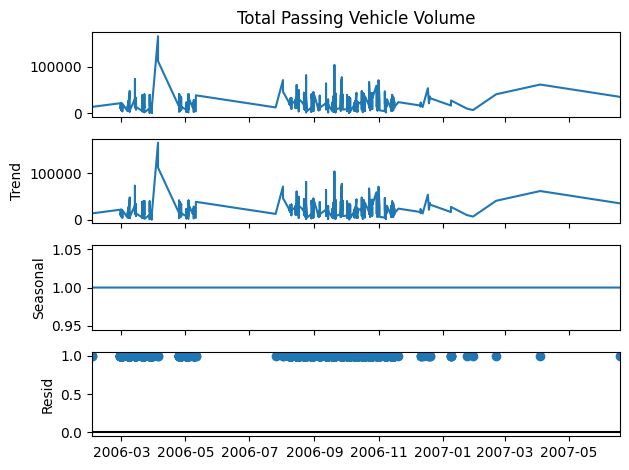

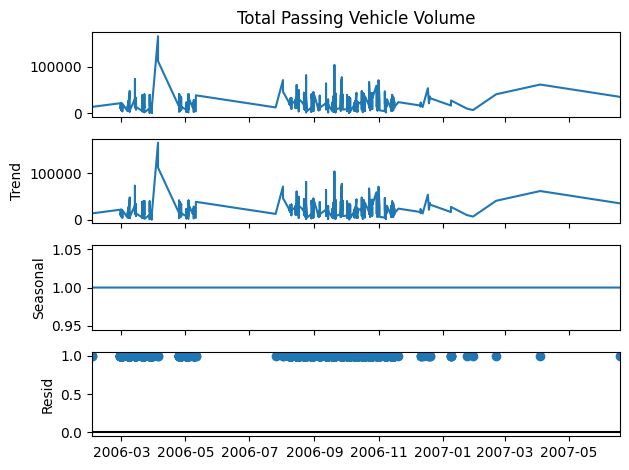

In [12]:
ets.plot()